# Splicing analysis on MS 3' data

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

input_dir = "/usersdata/yuanhua/archiveEBI/msclerosis/analysis/annoV33/"
dat_dir = "/usersdata/yuanhua/msNewData/"

os.chdir(dat_dir)

## Load data

In [2]:
adata = sc.read(input_dir + "expr_csf.raw_counts.annoV33.h5ad")

Only considering the two last: ['.annoV33', '.h5ad'].
Only considering the two last: ['.annoV33', '.h5ad'].


In [3]:
adata

AnnData object with n_obs × n_vars = 96961 × 19411
    obs: 'cell', 'batch', 'donorseq', 'donor_id', 'tissue', 'doublet_score', 'doublet_label', 'assigned', 'affection', 'disease', 'age', 'gender', 'rcc', 'iih', 'inflammation', 'ms_type', 'oligoclonal', 'oligoclonal_description', 'burden_score', 'recruitment_month', 'recruitment_year', 'onset_year', 'edss', 'active', 'last_relapse_months', 'mri_head', 'mri_cord', 'meds', 'pressure_csf', 'polymorph_count_csf', 'lymphocyte_count_csf', 'protein_csf', 'glucose_csf', 'glucose_blood', 'glucose_ratio', 'n_counts', 'n_genes', 'mito_frac', 'hemo_frac', 'ig_frac', 'louvain', 'louvain_sub', 'sample_donor', 'ctl1', 'ctl0', 'lineage', 'donor', 'Sample', 'percent_mito', 'year_month', 'CellTypes_postsoupX', 'CellTypes_presoupX', 'CellTypes_presoupX_clean', 'CellTypes_postsoupX_clean', 'CellTypes_postsoupX_cleaner', 'CellTypes_postsoupX_master', 'CellTypes_postsoupX_master_higher', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p

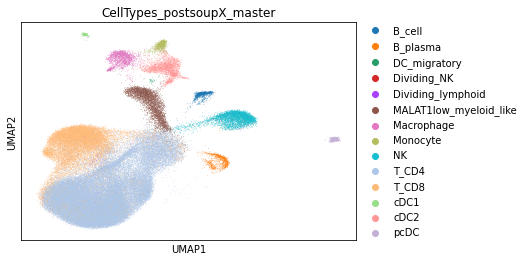

In [4]:
sc.pl.umap(adata, color="CellTypes_postsoupX_master")

In [5]:
adata.obs.index

Index(['S14618-G1-AAAGTAGCACGTTGGC', 'S14618-G1-AAGGAGCCATACGCCG',
       'S14618-G1-AATCGGTTCCGAATGT', 'S14618-G1-ACACCAAAGTGCGTGA',
       'S14618-G1-ACACCGGGTTCCACAA', 'S14618-G1-ACACTGATCTCTAGGA',
       'S14618-G1-ACAGCTATCTACCAGA', 'S14618-G1-ACCGTAACAAAGGAAG',
       'S14618-G1-ACCGTAATCTACCAGA', 'S14618-G1-ACCGTAATCTCGAGTA',
       ...
       'S14619-H3-TTTGCGCCACCAGCAC', 'S14619-H3-TTTGCGCCACCGAAAG',
       'S14619-H3-TTTGCGCCAGTCCTTC', 'S14619-H3-TTTGGTTAGACATAAC',
       'S14619-H3-TTTGGTTAGCGTAATA', 'S14619-H3-TTTGGTTCAAAGGAAG',
       'S14619-H3-TTTGGTTGTTTGTTTC', 'S14619-H3-TTTGTCAAGTTGAGTA',
       'S14619-H3-TTTGTCACAGCTCGCA', 'S14619-H3-TTTGTCATCAGTCAGT'],
      dtype='object', name='cell_id', length=96961)

## Load Splicing data


In [6]:
import scqtlib
from scipy.sparse import hstack
from scqtlib.utils.io_utils import load_10X, save_10X

In [7]:
sampDir = dat_dir + '/fromMarc/splicing/allRun-ZC3HAV1/'
samples = [ f.name for f in os.scandir(sampDir) if f.is_dir() ]
samples[0], len(samples)

('S12765-B2', 84)

In [8]:
import brie
_adata = brie.read_brieMM(sampDir + samples[0] + '/read_count.mtx', 
                          return_type='adata', keys=['1', '2', '3'])
_genes = pd.read_csv(sampDir + samples[0] + '/gene_note.tsv', sep='\t')
_cells = pd.read_csv(sampDir + samples[0] + '/cell_note.tsv', sep='\t', header=None)
_cells.columns = ['CB_Tag']
_cells.index = [samples[0] + '-' + x[:-2] for x in _cells.CB_Tag]

_adata.obs = _cells
_adata.var = _genes

In [9]:
_adata

AnnData object with n_obs × n_vars = 262 × 1
    obs: 'CB_Tag'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs'
    layers: '1', '2', '3'

In [10]:
adata_list = []
for i in range(0, len(samples)):
    print(i, samples[i])
    
    _adata = brie.read_brieMM(sampDir + samples[i] + '/read_count.mtx', 
                              return_type='adata', keys=['1', '2', '3'])
    _genes = pd.read_csv(sampDir + samples[i] + '/gene_note.tsv', sep='\t')
    _cells = pd.read_csv(sampDir + samples[i] + '/cell_note.tsv', sep='\t', 
                         header=None)
    _cells.columns = ['CB_Tag']
    _cells.index = [samples[i] + '-' + x[:-2] for x in _cells.CB_Tag]

    _adata.obs = _cells
    _adata.var = _genes

    adata_list.append(_adata)

0 S12765-B2
1 S14076-H7
2 S14077-H5
3 S14091-G2
4 S14092-H2
5 S14097-A9
6 S14100-C10
7 S14101-D10
8 S14102-E10
9 S14615-A1
10 S14616-E1
11 S14617-B3
12 S14618-B1
13 S14618-C1
14 S14618-D1
15 S14618-G1
16 S14618-H1
17 S14619-A3
18 S14619-F1
19 S14619-G3
20 S14619-H3
21 S14764-C3
22 S14962-A4
23 S14962-B4
24 S14962-E4
25 S14962-F4
26 S15203-E6
27 S15203-G6
28 S15203-H8
29 S15204-E11
30 S15204-E9
31 S15204-F11
32 S15204-H10
33 S15208-F9
34 S15291-E10
35 S15291-F7
36 S15291-G10
37 S15291-H9
38 S15297-F9
39 S15297-G9
40 S15299-D10
41 S15405-A3
42 S15406-A2
43 S15406-B3
44 S15406-C3
45 S15406-D3
46 S15409-B2
47 S15409-D2
48 S15425-A12
49 S15737-C9
50 S15737-E10
51 S15737-F4
52 S15844-F5
53 S15844-F8
54 S15844-G5
55 S15844-H5
56 S15850-B4
57 S15850-B6
58 S15924-A2
59 S15924-E1
60 S15924-F3
61 S15924-G12
62 S15924-H12
63 S16802-B4
64 S16802-C5
65 S16802-F8
66 S16802-F9
67 S16803-E5
68 S16803-F12
69 S16803-G12
70 S16803-G9
71 S16803-H12
72 S16803-H9
73 S16857-E3
74 S16898-A12
75 S16898-A6
76 S1

In [11]:
adata_brie = sc.concat(adata_list, merge="same")
adata_brie

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 165362 × 1
    obs: 'CB_Tag'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs'
    layers: '1', '2', '3'

In [12]:
np.mean(adata_brie.X.A == 0)

0.7518293199163049

In [13]:
adata.obs

,cell,batch,donorseq,donor_id,tissue,doublet_score,doublet_label,assigned,affection,disease,...,leiden,leiden_preBBKNN,Celltype,Celltypes,Include,Celltypes_master,Celltypes_master_higher,celltype,celltype_group,use_cell
cell_id,,,,,,,,,,,,,,,,,,,,,
S14618-G1-AAAGTAGCACGTTGGC,AAAGTAGCACGTTGGC-1-0,0,S14618-G1,TU0531,CSF,0.463,False,True,1.0,NIND,...,11,12,Macrophage,Macrophage_SPP1,True,Macrophage,Myeloid,macrophage,Myeloid,True
S14618-G1-AAGGAGCCATACGCCG,AAGGAGCCATACGCCG-1-0,0,S14618-G1,TU0531,CSF,0.304,False,True,1.0,NIND,...,0,2,T_CD4,T_CD4_CTL,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True
S14618-G1-AATCGGTTCCGAATGT,AATCGGTTCCGAATGT-1-0,0,S14618-G1,TU0531,CSF,0.478,False,True,1.0,NIND,...,2,1,T_CD4,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True
S14618-G1-ACACCAAAGTGCGTGA,ACACCAAAGTGCGTGA-1-0,0,S14618-G1,TU0531,CSF,0.282,False,True,1.0,NIND,...,1,0,T_CD8,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True
S14618-G1-ACACCGGGTTCCACAA,ACACCGGGTTCCACAA-1-0,0,S14618-G1,TU0531,CSF,0.338,False,True,1.0,NIND,...,1,0,T_CD8,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S14619-H3-TTTGGTTCAAAGGAAG,TTTGGTTCAAAGGAAG-1-83,83,S14619-H3,TU0548,CSF,0.054,False,True,2.0,MS,...,5,10,T_CD4,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True
S14619-H3-TTTGGTTGTTTGTTTC,TTTGGTTGTTTGTTTC-1-83,83,S14619-H3,TU0548,CSF,0.227,False,True,2.0,MS,...,7,11,Monocyte,cDC2,True,cDC2,Myeloid,cDC2,Myeloid,True
S14619-H3-TTTGTCAAGTTGAGTA,TTTGTCAAGTTGAGTA-1-83,83,S14619-H3,TU0548,CSF,0.083,False,True,2.0,MS,...,5,6,T_CD4,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True


In [14]:
_idx = brie.match(adata.obs.index, adata_brie.obs.index)

adata = adata[_idx != None, :]
adata_brie = adata_brie[_idx[_idx != None].astype(int), :]

adata.obs['isoform1'] = adata_brie.layers['1'].A[:, 0]
adata.obs['isoform2'] = adata_brie.layers['2'].A[:, 0]

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


In [15]:
adata_brie

View of AnnData object with n_obs × n_vars = 89676 × 1
    obs: 'CB_Tag'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs'
    layers: '1', '2', '3'

In [16]:
np.unique(adata.obs['Celltypes_master'])

array(['B_cell', 'B_plasma', 'DC_migratory', 'MALAT1low_myeloid_like',
       'Macrophage', 'Monocyte', 'NK', 'PTGDS_low_counts', 'RedBloodCell',
       'T_CD4', 'T_CD8', 'T_gd', 'cDC1', 'cDC2', 'pcDC'], dtype=object)

In [17]:
np.unique(adata.obs['donorseq'])[:3], np.unique(adata.obs['donor_id'])[:3]

(array(['S12765-B2', 'S14076-H7', 'S14091-G2'], dtype=object),
 array(['TU0517', 'TU0522', 'TU0523'], dtype=object))

In [18]:
np.unique(adata.obs['donor_id'])

array(['TU0517', 'TU0522', 'TU0523', 'TU0527', 'TU0529', 'TU0531',
       'TU0532', 'TU0533', 'TU0534', 'TU0535', 'TU0538', 'TU0539',
       'TU0540', 'TU0541', 'TU0543', 'TU0547', 'TU0548', 'TU0549',
       'TU0550', 'TU0551', 'TU0552', 'TU0553', 'TU0555', 'TU0556',
       'TU0557', 'TU0558', 'TU0559', 'TU0563', 'TU0564', 'TU0566',
       'TU0567', 'TU0569', 'TU0570', 'TU0572', 'TU0573', 'TU0574',
       'TU0575', 'TU0577', 'TU0578', 'TU0582', 'TU0584', 'TU0586',
       'TU0588', 'TU0589', 'TU0591', 'TU0592', 'TU0593', 'TU0594',
       'TU0595', 'TU0596', 'TU0597', 'TU0598', 'TU0599', 'TU0600',
       'TU0602', 'TU0604', 'TU0605', 'TU0606', 'TU0607', 'TU0609',
       'TU0611', 'TU0613', 'TU0615', 'TU0616', 'TU0617', 'TU0619',
       'TU0620', 'TU0622', 'TU0623', 'TU0624', 'TU0626', 'TU0627',
       'TU0628', 'TU0629', 'TU0638', 'TU0640', 'TU0645', 'TU0646',
       'TU0647', 'TU0649', 'TU0650'], dtype=object)

In [19]:
adata.obs['donorID'] = ['TU' + x[3:] for x in adata.obs['donor_id']]

## Analysing genetic effects

In [20]:
_donors = np.unique(adata.obs['donorID'])

# drop TU640 as eQTL analysis
_donors = np.delete(_donors, _donors=='TU640')

In [21]:
df_ms = pd.read_csv('/usersdata/yuanhua/msNewData/fromMarc/eQTL_info.tsv', 
                    sep='\t', index_col=0)
df_ms = df_ms.loc[_donors]

In [22]:
print(df_ms.shape)
df_ms.head()

(80, 12)


,Seq,Disease,isMS,7_138729795,11_309127,12_9876091,17_38023745,6_31583155,6_32397309,6_32605884,6_32611982,6_135798845
ID,,,,,,,,,,,,
TU517,S12765-B2,MS,MS,2,1,0,0,0,0,0,0,1
TU522,S14091-G2,NIND,Non,2,1,2,0,1,2,0,0,0
TU523,S14076-H7,NIND,Non,2,1,1,1,1,2,0,0,1
TU527,S14092-H2,IIH,Non,0,0,0,0,0,1,1,0,2
TU529,S14097-A9,NIND,Non,0,1,1,0,0,2,0,0,1


In [23]:
_isoform1 = []
_isoform2 = []
_cell_type = 'T_CD8'

for i in range(df_ms.shape[0]):
    _donor = df_ms.index[i]
    _idx = ((adata.obs['donorID'] == _donor) * 
            (adata.obs['Celltypes_master'] == _cell_type))
    
    _isoform1.append(adata.obs['isoform1'][_idx].sum())
    _isoform2.append(adata.obs['isoform2'][_idx].sum())

In [24]:
df_ms['isoform1'] = _isoform1
df_ms['isoform2'] = _isoform2
df_ms['Psi'] = df_ms['isoform1']  / (df_ms['isoform1'] + df_ms['isoform2'])

In [25]:
df_ms = df_ms.loc[df_ms.index[np.argsort(df_ms.isMS)]]

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


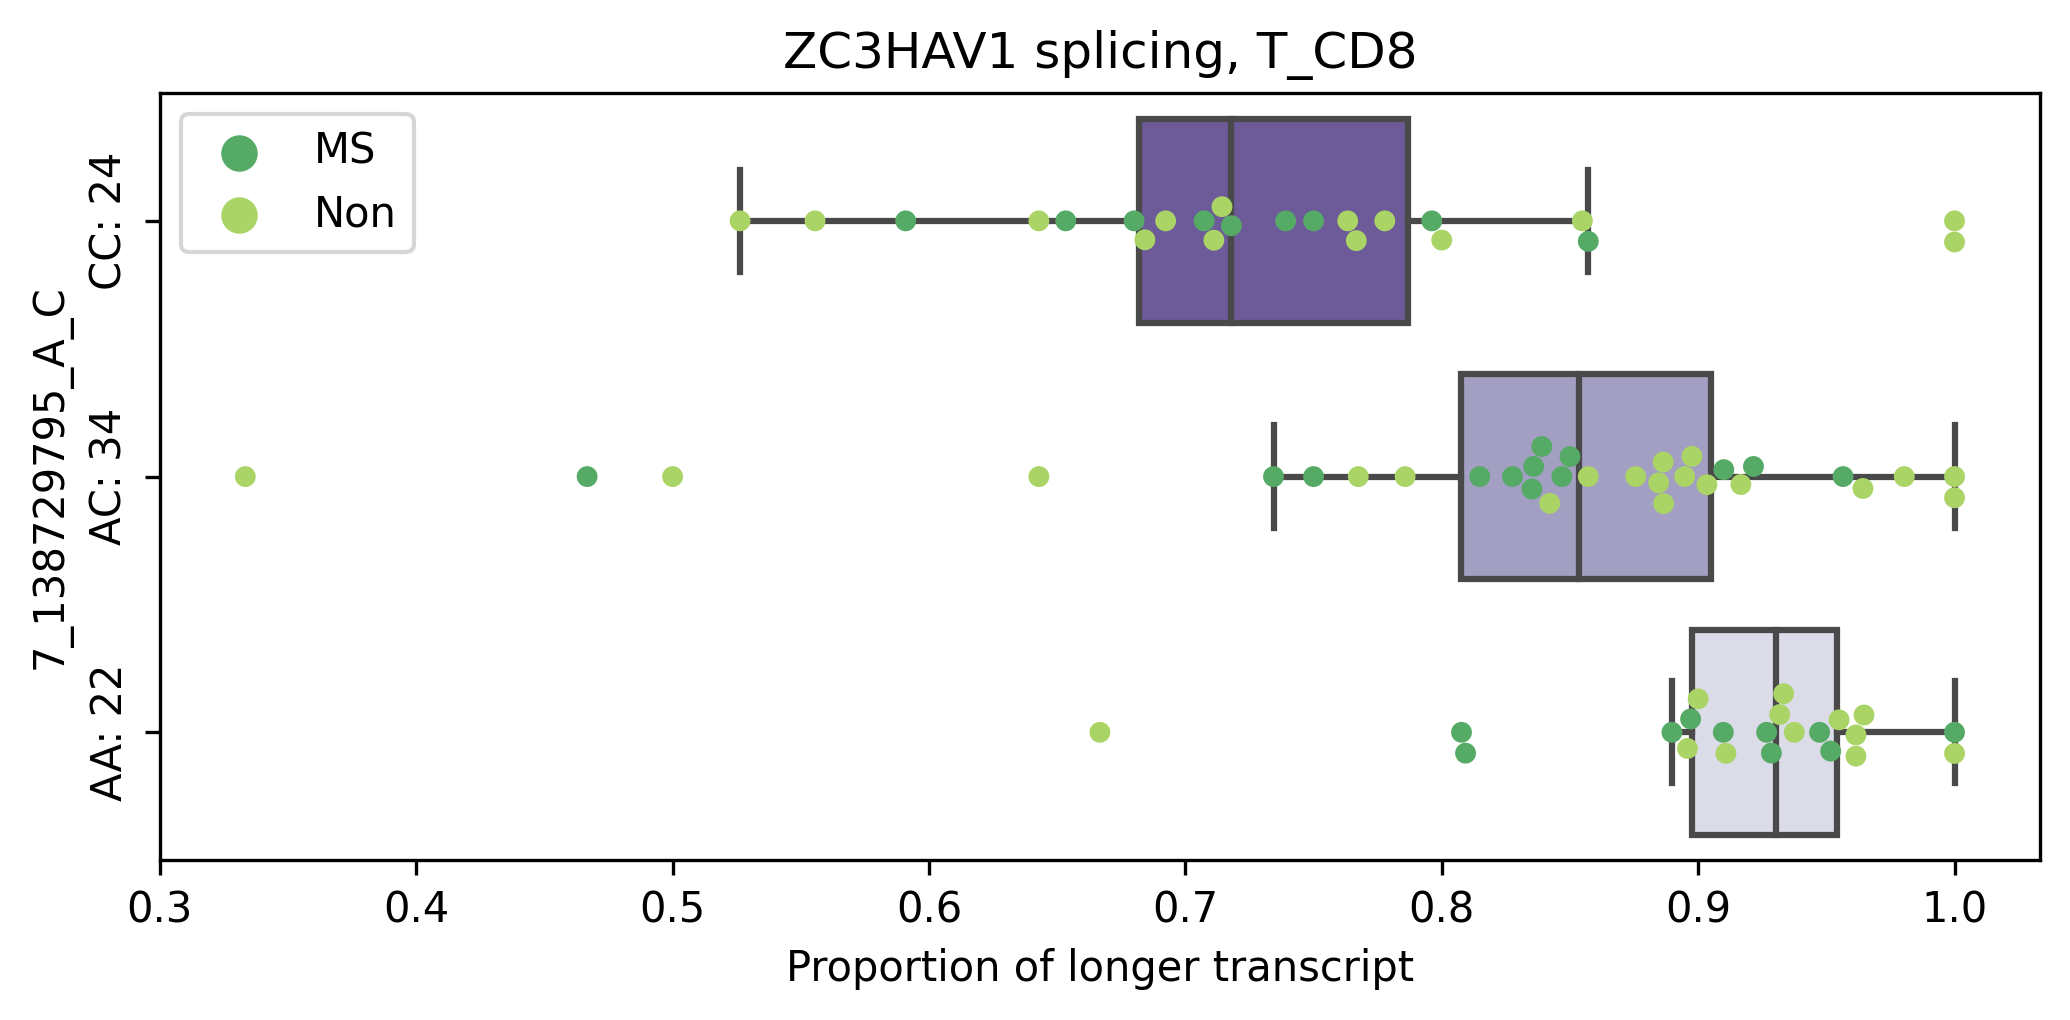

In [26]:
import scqtlib

fig_dir = '/usersdata/yuanhua/msNewData/fromMarc/figures/'

_snp_id = '7_138729795'
_snp_id_full = '7_138729795_A_C'


fig = plt.figure(figsize=(7, 3.5), dpi=300)
ax = plt.subplot(1,1,1)
scqtlib.plots.Gboxplot(
    df_ms[_snp_id], 
    df_ms['Psi'], 
    SNP_name=_snp_id_full,
    dot_hue=df_ms['isMS'].values,
    palette='Purples', orient="h"
)

plt.xlabel('Proportion of longer transcript')
# plt.xlabel('Isoform1 proportion (the shorter)')
# plt.ylabel(_snp_id)
# plt.xticks(['AA', 'AC', 'CC'])
plt.title('ZC3HAV1 splicing, %s' %(_cell_type))
plt.tight_layout()
plt.savefig(fig_dir + '/ZC3HAV1_splicing_%s.pdf' %(_cell_type))

plt.show()

In [27]:
print(
    1 - np.mean(df_ms['Psi'][df_ms[_snp_id] == 0]),
    1 - np.mean(df_ms['Psi'][df_ms[_snp_id] == 1]),
    1 - np.mean(df_ms['Psi'][df_ms[_snp_id] == 2])
)

0.08697032134446414 0.17477394326882323 0.26168963879836016


In [28]:
out_dir = '/usersdata/yuanhua/msNewData/eQTLres/splicing/'

# df_ms.to_csv(out_dir + 'ZC3HAV1_splicing-%s.tsv' %(_cell_type), sep='\t')

#### R script

```R
library(aod)
file_name = '/usersdata/yuanhua/msNewData/eQTLres/splicing/ZC3HAV1_splicing-T_CD8.tsv'
df_data = read.table(file_name, sep='\t', header=1)


fm1 <- aod::betabin(cbind(isoform1, isoform2) ~ X7_138729795, ~ 1, data = df_data)

summary(fm1)

# fm0 <- aod::betabin(cbind(isoform1, isoform2) ~ 1, ~ 1, data = df_data)
# pchisq(fm0@dev - fm1@dev, df=1, lower.tail=FALSE, log.p=FALSE)

fm2 <- aod::betabin(cbind(isoform1, isoform2) ~ isMS, ~ 1, data = df_data)
summary(fm2)
```